In [1]:
import os
if os.getcwd().split("/")[-1] != 'BENDR-XAI': os.chdir("../")

import mne
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from matplotlib import animation
import matplotlib.cm as cm
import sys
from tqdm import tqdm, trange

In [2]:
# T0: Rest (runs 1,2)
# T1: onset of motion (real or imagined)
    # left fist (runs 3,4,7,8,11,12)
    # both fists (runs 5,6,9,10,13,14)
# T2: onset of motion (real or imagined)
    # right fist (runs 3,4,7,8,11,12)
    # both feet (runs 5,6,9,10,13,14)

In [3]:
PATH = '/home/williamtheodor/Documents/DL for EEG Classification/mmidb_aparc.a2009s_1.0.npy'

data = np.load(PATH, allow_pickle=True).item()

In [4]:
subjects_dir, subject, trans, src_path, bem_path = get_fsaverage()

parcellation_name = "aparc.a2009s"
labels = get_labels(subjects_dir, parcellation_name = parcellation_name)
labels = np.array(labels).flatten()

In [5]:
data

{'S001': {'S001R01': {'T0': array([[0.34907117, 0.16534948, 0.15909367, ..., 0.30228919, 0.27024572,
           0.13171759],
          [0.13688198, 0.29358271, 0.22630787, ..., 0.1373968 , 0.14707578,
           0.10896688],
          [0.15947686, 0.41036733, 0.33139124, ..., 0.31860873, 0.36918252,
           0.08351943],
          ...,
          [0.15907603, 0.32066515, 0.18900951, ..., 0.24411534, 0.21538314,
           0.07412995],
          [0.16177622, 0.19681214, 0.02340037, ..., 0.58329632, 0.42544403,
           0.10631008],
          [0.31188694, 0.44113361, 0.34696504, ..., 0.52631422, 0.51319003,
           0.12571818]]),
   'T1': array([[0.23193836, 0.23402705, 0.31543837, ..., 0.31037861, 0.40633929,
           0.12040462],
          [0.34449192, 0.2019661 , 0.25001738, ..., 0.49652227, 0.48723648,
           0.15878183],
          [0.27224789, 0.1656459 , 0.25660586, ..., 0.46941108, 0.4355047 ,
           0.14268685],
          ...,
          [0.19164786, 0.16858108, 0.

In [6]:
data_summed = {}

for patient in data:

    patient_dict = {}
    for run in data[patient]:

        run_dict = {}
        for annotation in data[patient][run]:
            pass


In [7]:
import seaborn as sns

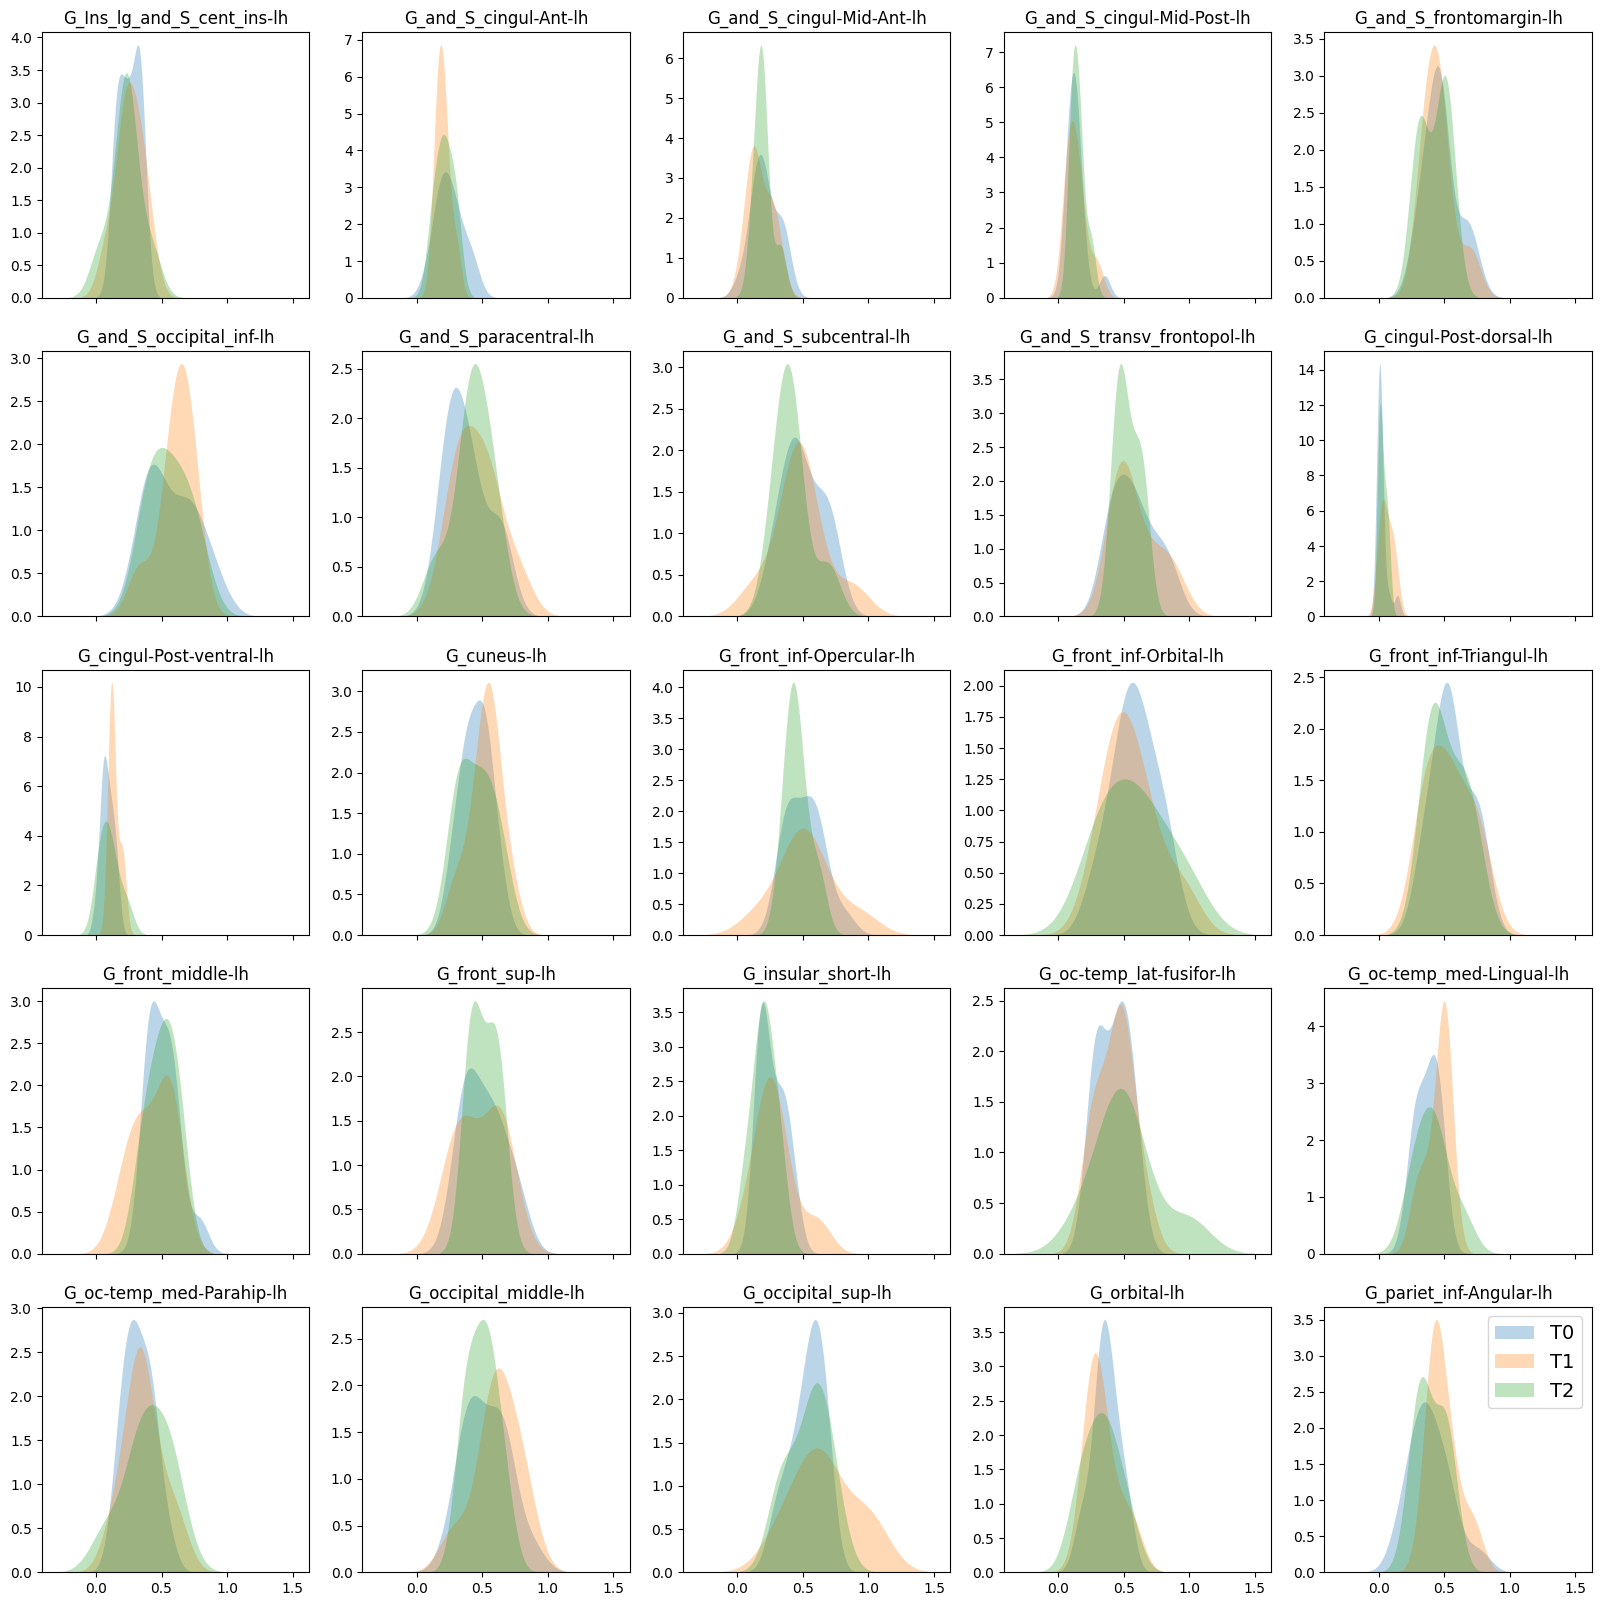

In [20]:
run = data['S002']['S002R04'].copy()

nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(20, 20), sharex=True)

for annotation in run.keys(): # T0, T1, T2
    for label in range(nx*ny):
        x = label // nx
        y = label % ny
        sns.kdeplot(ax=ax[x][y], x=[run[annotation][i][label] for i in range(len(run[annotation]))], fill=True, alpha=.3, linewidth=0)
        ax[x][y].set_title(labels[label].name)
        ax[x][y].set_ylabel('')

plt.legend(run.keys(), fontsize=14)
plt.show()

In [15]:
run = data['S002']['S002R04'].copy()


total_activity = np.array([])
left_activity = np.array([])
right_activity = np.array([])

left_activity_prop = np.array([])
right_activity_prop = np.array([])

left_activity_summed = np.array([])
right_activity_summed = np.array([])

annotation_names = []

for annotation in run.keys(): # T0, T1, T2

    n_annotations = run[annotation].shape[0]

    annotation_names += [annotation for _ in range(n_annotations)]

    total_activity = np.array([run[annotation][i].sum() for i in range(n_annotations)])

    print(total_activity)
    left_activity = np.array([run[annotation][i][:75].sum() for i in range(n_annotations)])
    right_activity = np.array([run[annotation][i][75:].sum() for i in range(n_annotations)])

    left_activity_prop = np.append(left_activity_prop, left_activity / total_activity)
    right_activity_prop = np.append(right_activity_prop, right_activity / total_activity)

    total_activity_summed = left_activity_prop.sum() + right_activity_prop.sum()

    #print(left_activity_prop.sum(), right_activity_prop.sum(), total_activity_summed)

    left_activity_summed = np.append(left_activity_summed, left_activity_prop.sum() / total_activity_summed)
    right_activity_summed = np.append(right_activity_summed, right_activity_prop.sum() / total_activity_summed)

[58.00655484 39.49621866 60.6543454  56.20869963 59.36768096 69.38479258
 75.07763885 72.96434779 62.02891396 60.25155961 49.67220921 62.98936708
 43.85956738 62.05934323 79.6675879 ]
[58.92148869 78.46864716 63.03049012 45.17255904 66.4565137  67.61894977
 33.66917403 69.86019617]
[74.15485103 50.04919229 55.42632604 62.46670383 39.0131142  68.89933539
 66.25739888]


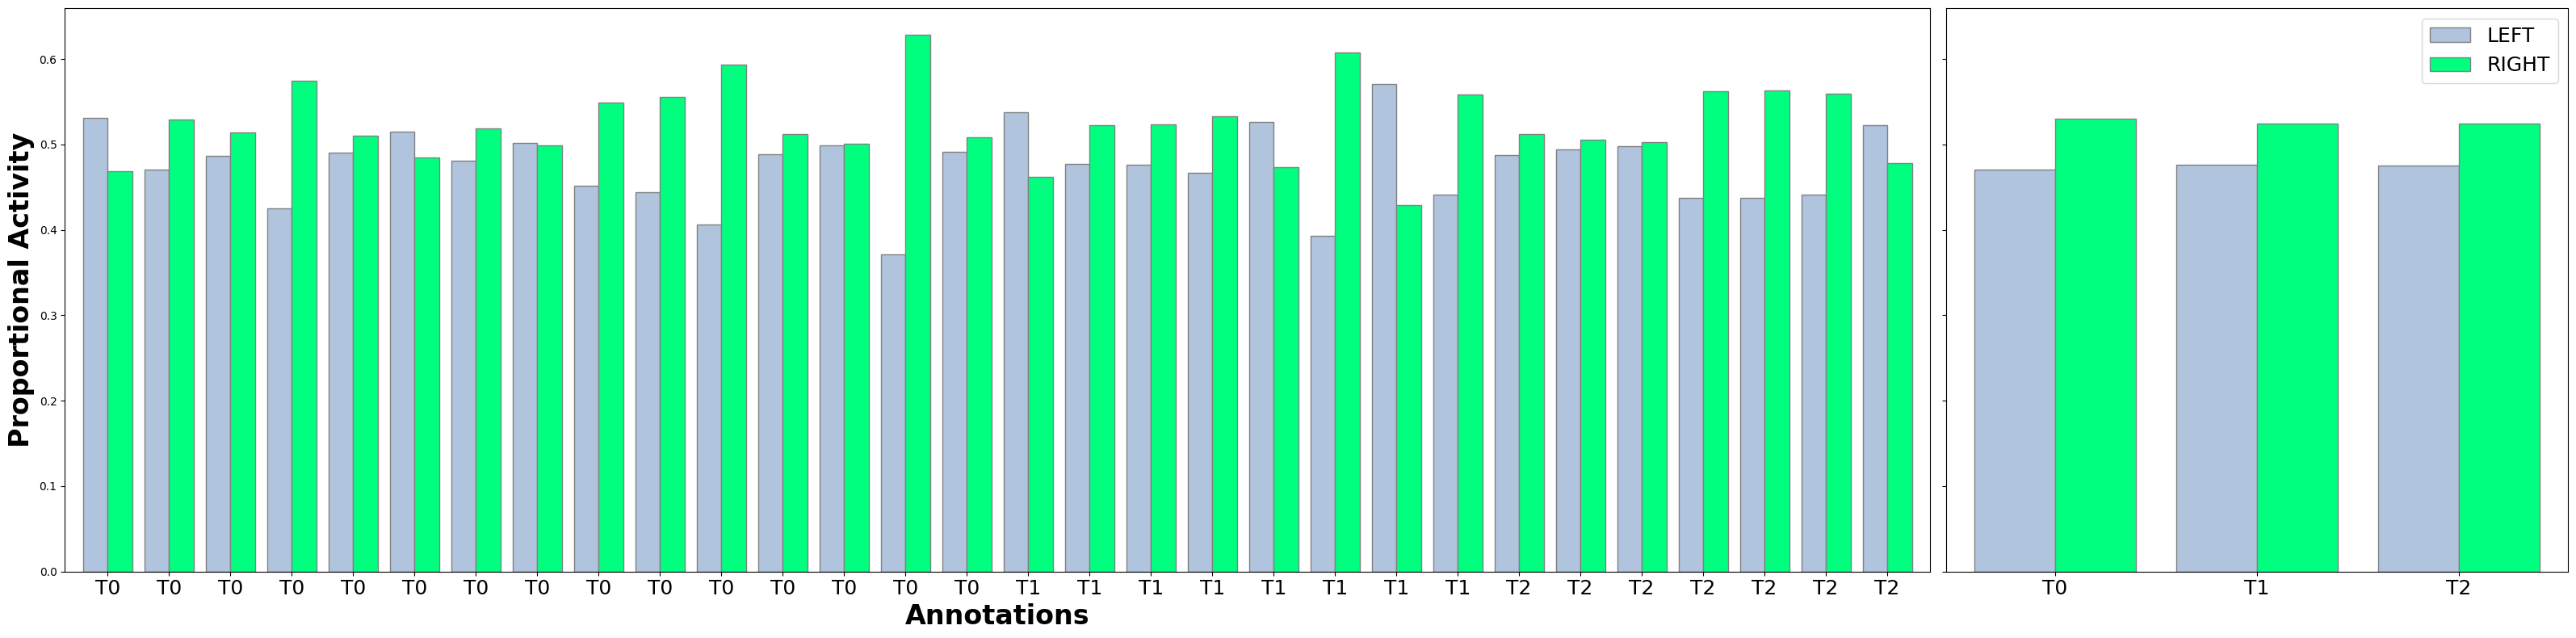

In [18]:
# set width of bar
barWidth = 0.4
fig, ax = plt.subplots(1, 2, figsize=(32, 8), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

# Set position of bar on X axis
X = np.arange(len(left_activity_prop))
br1 = [x - barWidth/2 for x in X]
br2 = [x + barWidth/2 for x in X]
 
# Make the plot
ax[0].bar(br1, left_activity_prop, color ='lightsteelblue', width = barWidth,
        edgecolor ='grey', label ='LEFT')
ax[0].bar(br2, right_activity_prop, color ='springgreen', width = barWidth,
        edgecolor ='grey', label ='RIGHT')

# Adding ticks
ax[0].set_xlabel('Annotations', fontweight ='bold', fontsize = 24)
ax[0].set_ylabel('Proportional Activity', fontweight ='bold', fontsize = 24)
ax[0].set_xticks(X, annotation_names, fontsize=18)
ax[0].margins(.01)


X2 = np.arange(len(left_activity_summed))
br3 = [x - barWidth/2 for x in X2]
br4 = [x + barWidth/2 for x in X2]

# Make the plot
ax[1].bar(br3, left_activity_summed, color ='lightsteelblue', width = barWidth,
        edgecolor ='grey', label ='LEFT')
ax[1].bar(br4, right_activity_summed, color ='springgreen', width = barWidth,
        edgecolor ='grey', label ='RIGHT')

ax[1].set_xticks(X2, ['T0', 'T1', 'T2'], fontsize=18)

plt.tight_layout() 
plt.legend(fontsize=18)
plt.show()

In [27]:
isolated_regions = []

for annotation in ['T1', 'T2']:
    for idx in range(len(run[annotation])):
        if sorted(run[annotation][idx])[-1]-sorted(run[annotation][idx])[-2] > 0.05:
            isolated_regions.append((annotation, labels[np.argmax(run[annotation][idx])].name))

In [28]:
isolated_regions

[('T1', 'G_occipital_sup-lh'),
 ('T1', 'Pole_occipital-rh'),
 ('T1', 'G_front_inf-Orbital-rh'),
 ('T1', 'G_occipital_sup-lh'),
 ('T2', 'G_postcentral-lh'),
 ('T2', 'G_temporal_inf-rh')]

Pole_occipital-rh 116


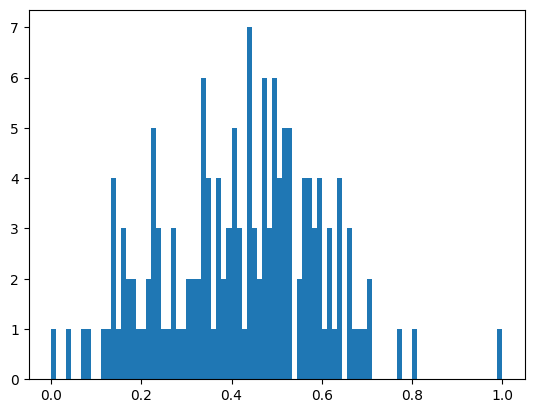

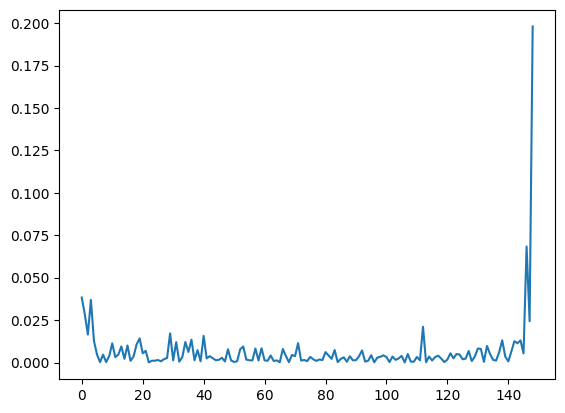

In [77]:
idx = 2
annotation = 'T1'


print(labels[np.argmax(run[annotation][idx])].name, np.argmax(run[annotation][idx]))

plt.hist(run[annotation][idx], bins=90);
plt.show()
plt.close()


diff = []

for i in range(150-1):
    diff.append()


plt.plot(diff)